# Table of Contents 
1. Importing Data and Libraries 
2. Data Cleaning
3. Data prep for regression analysis 
4. Regression analysis

## 1. Importing Data and Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\madic\OneDrive\Documents\Achievement 6\01 Data\Original Data\Life-Expectancy-Data-Updated.csv', index_col = False)

## 2.  Data cleaning

In [4]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkey,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [5]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [6]:
# Checking for missing values
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [7]:
# Checking for duplicates 
dups = df.duplicated()

In [9]:
dups.shape

(2864,)

C:\Users\madic\AppData\Local\Temp\ipykernel_24464\3979897883.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Life_expectancy'], bins=25)


<Axes: xlabel='Life_expectancy', ylabel='Density'>

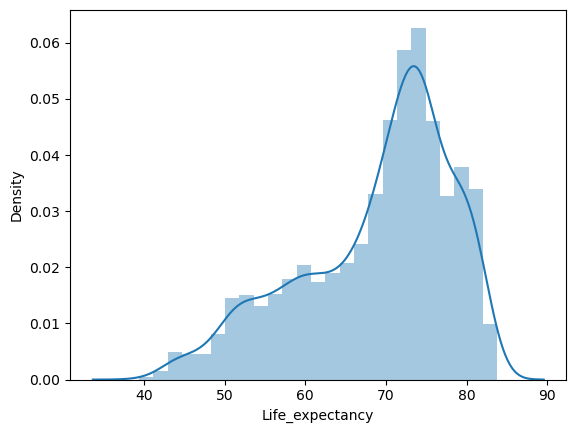

In [10]:
# Check for extreme values 
sns.distplot(df['Life_expectancy'], bins=25)

C:\Users\madic\AppData\Local\Temp\ipykernel_24464\2390209147.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Schooling'], bins=25)


<Axes: xlabel='Schooling', ylabel='Density'>

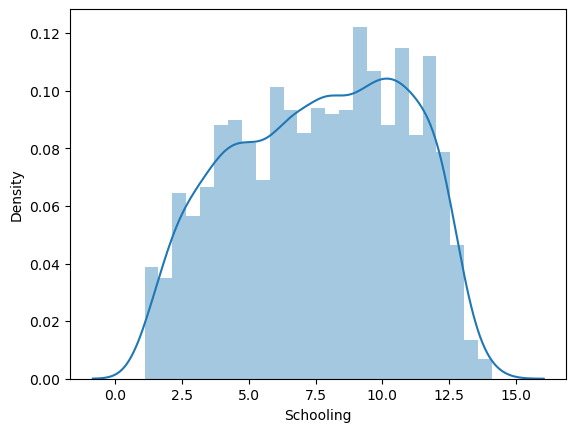

In [11]:
sns.distplot(df['Schooling'], bins=25)

## 3. Data prep for regression analysis

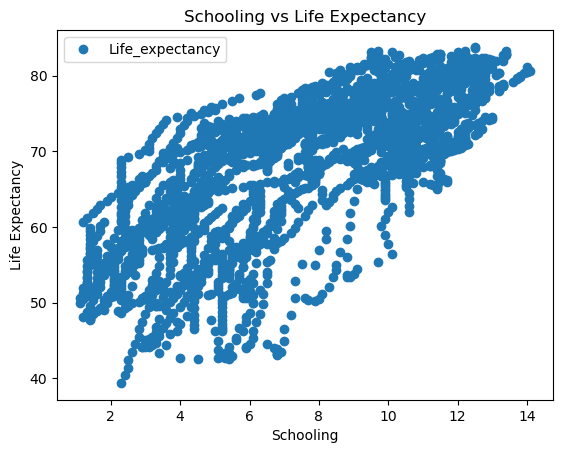

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Schooling', y='Life_expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Schooling vs Life Expectancy')  
plt.xlabel('Schooling')  
plt.ylabel('Life Expectancy')  
plt.show()

Hypothesis: If there is a higher amount of schooling, then the life expectancy will be higher. 

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Schooling'].values.reshape(-1,1)
y = df['Life_expectancy'].values.reshape(-1,1)

In [14]:
X

array([[ 7.8],
       [ 9.7],
       [ 5. ],
       ...,
       [10.3],
       [11.1],
       [11. ]])

In [15]:
y

array([[76.5],
       [82.8],
       [65.4],
       ...,
       [74.3],
       [71.8],
       [82.4]])

In [16]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [17]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

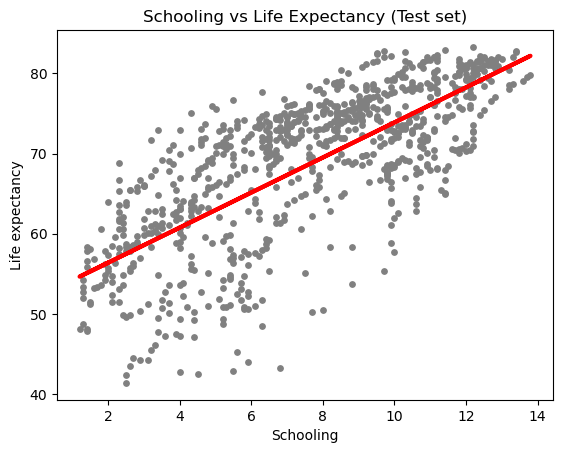

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Schooling vs Life Expectancy (Test set)')
plot_test.xlabel('Schooling')
plot_test.ylabel('Life expectancy')
plot_test.show()

In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.18571581]]
Mean squared error:  40.18453099242877
R2 score:  0.5324638829657138


In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,51.5,55.308156
1,68.1,67.548165
2,66.1,58.586730
3,52.5,64.269591
4,66.7,76.946743
5,54.7,56.619586
6,74.1,70.389596
7,64.1,73.668169
8,75.3,68.203880
9,57.5,64.925306


### Compare how regression fits training set

In [24]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.18571581]]
Mean squared error:  41.36318530634599
R2 score:  0.5377053885518523


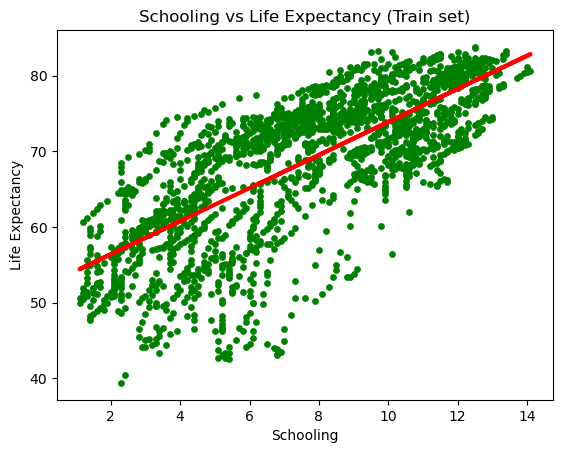

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Schooling vs Life Expectancy (Train set)')
plot_test.xlabel('Schooling')
plot_test.ylabel('Life Expectancy')
plot_test.show()

The mean square error value of 41 and the R2 value of 0.53 tells us that this model is not a great fit for the data. A better fit would show a lower mean square error value and an R2 value closer to 1.  